<a href="https://colab.research.google.com/github/kleeenv/training/blob/main/Training_Geospatial_forME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UD CSSA Training Session 2: Geospatial Analysis 

1. Load and explore data
  - World (WB)
  - Country (United States)
  - Region (Delaware)

2. Spatial join dataset
  - GDP?
  - carbon intensity?
  - vote?

## Step 1: Load and Explore Data

Guideline: https://www.twilio.com/blog/2017/08/geospatial-analysis-python-geojson-geopandas.html

Tutorial (WB data): https://geopandas.org/en/latest/docs/user_guide/mapping.html

WB data source: https://datacatalog.worldbank.org/search/dataset/0038272

GeoPython: https://automating-gis-processes.github.io/2016/Lesson2-geopandas-basics.html?highlight=loc

## 1st way to LOAD WB DATA using link

In [ ]:
#@title
!pip install geojsonio
!pip install geopandas
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 152 kB 16.3 MB/s 
     |████████████████████████████████| 4.1 MB 64.8 MB/s 
  Created wheel for geojsonio: filename=geojsonio-0.0.3-py3-none-any.whl size=5041 sha256=bcb7e3bb163ba6afaa37a60794f9a358b7fb20bd79c74ba7703d7cc445cb3cf8
  Stored in directory: /root/.cache/pip/wheels/21/ef/f0/71474034f127d681a5cde034ccd6ca0a8fdb117ff24623b855
Successfully built geojsonio
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 12.1 MB/s 
     |████████████████████████████████| 16.7 MB 274 kB/s 
     |████████████████████████████████| 6.3 MB 62.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geojsonio
import geopandas as gp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Explore the dataset in WB platform 
gname = "/content/drive/MyDrive/1. Research Experience/Paper_Scenario/dataset/WB_Boundaries_GeoJSON_highres/WB_Admin0_boundary_lines.geojson"
boundary = gp.read_file(gname)
boundary

,FID,featurecla,name,comment,adm0_usa,adm0_left,adm0_right,adm0_a3_l,adm0_a3_r,type,geometry
0,0,Indefinite (please verify),,,1,Canada,United States of America,CAN,USA,Water Indicator,"LINESTRING (-124.75887 48.49402, -124.58286 48..."
1,1,International boundary (verify),,,1,Sweden,Norway,SWE,NOR,Water Indicator,"LINESTRING (11.43751 58.99172, 11.40094 59.025..."
2,2,International boundary (verify),,,1,Denmark,Germany,DNK,DEU,Water Indicator,"MULTILINESTRING ((8.39409 55.09633, 8.45238 55..."
3,3,International boundary (verify),,,1,Singapore,Malaysia,SGP,MYS,Water Indicator,"LINESTRING (104.06768 1.27739, 104.06556 1.326..."
4,4,International boundary (verify),,,1,Uruguay,Argentina,URY,ARG,Water Indicator,"LINESTRING (-58.20011 -32.44713, -58.20012 -32..."
...,...,...,...,...,...,...,...,...,...,...,...
432,432,Disputed (please verify),,,1,Bhutan,China,BTN,CHN,Land,"MULTILINESTRING ((90.32950 28.25580, 90.29147 ..."
433,433,Line of control (please verify),Line of control,,1,India,Pakistan,IND,PAK,Land,"MULTILINESTRING ((74.67175 32.84058, 74.68529 ..."
434,434,International boundary (verify),,,1,Bhutan,Bhutan,BTN,BTN,Land,"LINESTRING (88.98297 27.49263, 88.96620 27.478..."
435,435,Disputed (please verify),,,1,Bhutan,Bhutan,BTN,BTN,Land,"MULTILINESTRING ((89.10586 27.62295, 89.10957 ..."


In [ ]:
# Explore the dataset in WB platform 
gname = "/content/drive/MyDrive/1. Research Experience/Paper_Scenario/dataset/WB_Boundaries_GeoJSON_highres/WB_countries_Admin0.geojson"
countries = gp.read_file(gname)
countries

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,,17789267,14,436100.0,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,,11138234,14,78350.0,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,,31036656,15,410400.0,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,247,Admin-0 country,2,Dependency,,,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Navassa Island (US),Name in italic,Other,0.085608,0.000413,"POLYGON ((-75.02432 18.41726, -75.03026 18.417..."
247,247,248,Admin-0 country,2,Dependency,,,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Palmyra Atoll (US),Name in italic,Other,0.147363,0.000576,"POLYGON ((-162.06086 5.88719, -162.07136 5.890..."
248,248,249,Admin-0 country,2,Dependency,,,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Kingman Reef (US),Name in italic,Other,0.059570,0.000222,"POLYGON ((-162.40018 6.44514, -162.40018 6.430..."
249,249,250,Admin-0 country,2,Country,New Zealand,,4510327,12,174800.0,...,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,Tokelau (NZ),Name in italic,Other,0.178453,0.000348,"MULTIPOLYGON (((-171.18566 -9.36126, -171.1873..."


In [ ]:
# See all columns in geodataframe
# Way 1 
print(countries.columns.tolist()) 
print("")
# Way 2 
countries.columns 

['FID', 'OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN', 'FORMAL_FR', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH', 'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area', 'geometry']



Index(['FID', 'OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN',
       'FORMAL_FR', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR',
       'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [ ]:
# Check types of dataset in specific column
type(countries['GDP_MD_EST'][0])

numpy.float64

In [ ]:
# Check a specific column
countries["FORMAL_EN"]

0               Republic of Indonesia
1                            Malaysia
2                   Republic of Chile
3      Plurinational State of Bolivia
4                    Republic of Peru
                    ...              
246                                  
247                                  
248                                  
249                       New Zealand
250                       New Zealand
Name: FORMAL_EN, Length: 251, dtype: object

In [ ]:
countries[['FORMAL_EN', 'GDP_MD_EST', 'INCOME_GRP', 'POP_EST','CONTINENT','geometry']]

,FORMAL_EN,GDP_MD_EST,INCOME_GRP,POP_EST,CONTINENT,geometry
0,Republic of Indonesia,3028000.0,4. Lower middle income,260580739,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,Malaysia,863000.0,3. Upper middle income,31381992,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,Republic of Chile,436100.0,3. Upper middle income,17789267,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,Plurinational State of Bolivia,78350.0,4. Lower middle income,11138234,South America,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,Republic of Peru,410400.0,3. Upper middle income,31036656,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
...,...,...,...,...,...,...
246,,0.0,5. Low income,300,North America,"POLYGON ((-75.02432 18.41726, -75.03026 18.417..."
247,,0.0,5. Low income,300,North America,"POLYGON ((-162.06086 5.88719, -162.07136 5.890..."
248,,0.0,5. Low income,300,North America,"POLYGON ((-162.40018 6.44514, -162.40018 6.430..."
249,New Zealand,174800.0,1. High income: OECD,4510327,Oceania,"MULTIPOLYGON (((-171.18566 -9.36126, -171.1873..."


In [ ]:
# See counts of data
countries['GDP_YEAR'].value_counts()

2016    211
0        10
2015      7
2014      6
2013      6
2010      3
2012      2
2009      2
1999      1
2007      1
2006      1
2003      1
Name: GDP_YEAR, dtype: int64

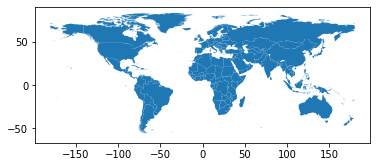

In [ ]:
# Plot geodata frame 
countries.plot()

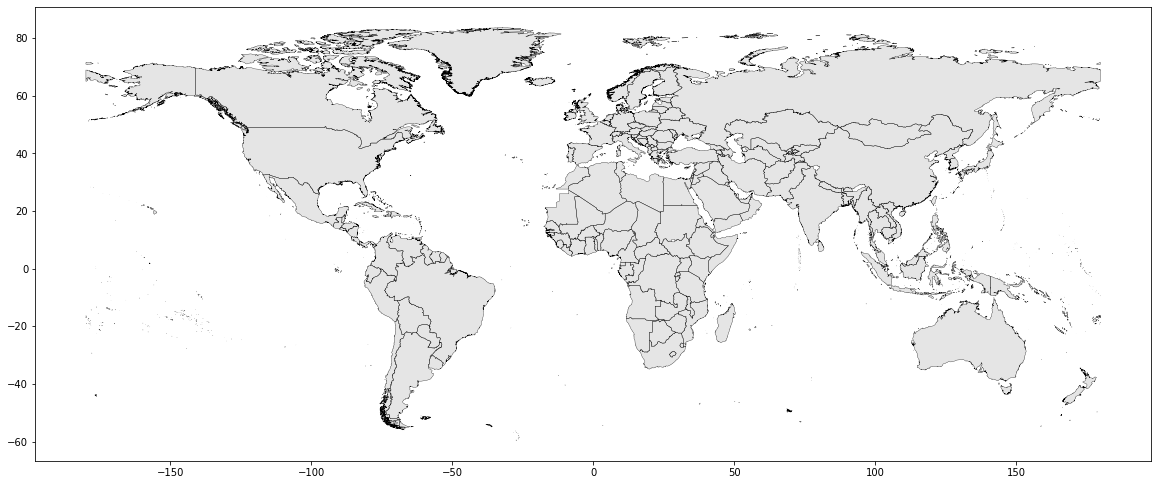

In [ ]:
# Plot base map and check setting 
fig, ax = plt.subplots(figsize=(20,15))
countries.plot(ax=ax, color="gray", alpha=0.2)
countries.boundary.plot(ax=ax, color="black", lw=0.3)

cmap https://matplotlib.org/stable/tutorials/colors/colormaps.html


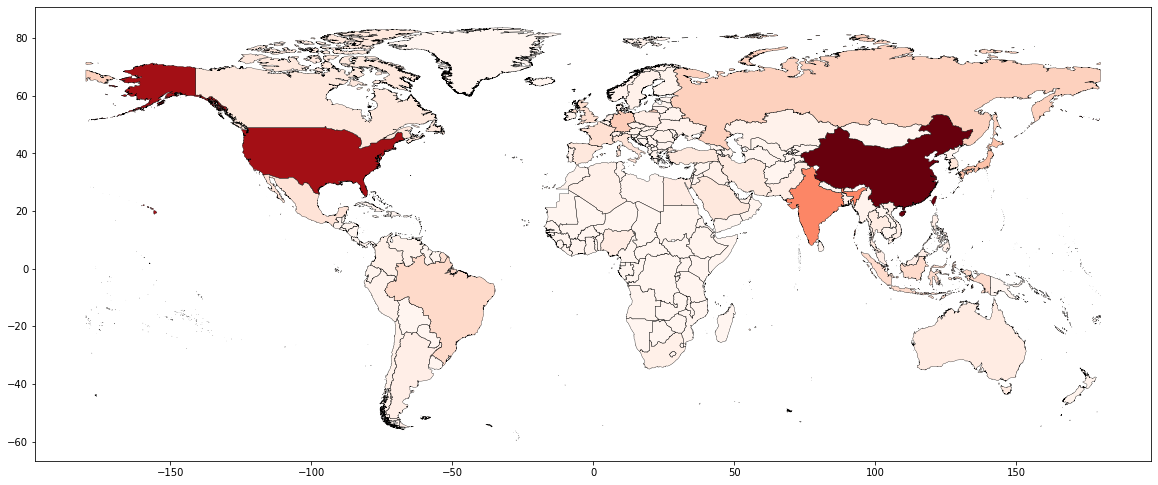

In [ ]:
# Color the map: GDP
fig, ax = plt.subplots(figsize=(20,15))
countries.plot(ax=ax, color="gray", alpha=0.2)
countries.boundary.plot(ax=ax, color="black", lw=0.3)
countries.plot('GDP_MD_EST', ax=ax, cmap="Reds")

Text(0.0, 1.0, 'World Income Level by Countries')

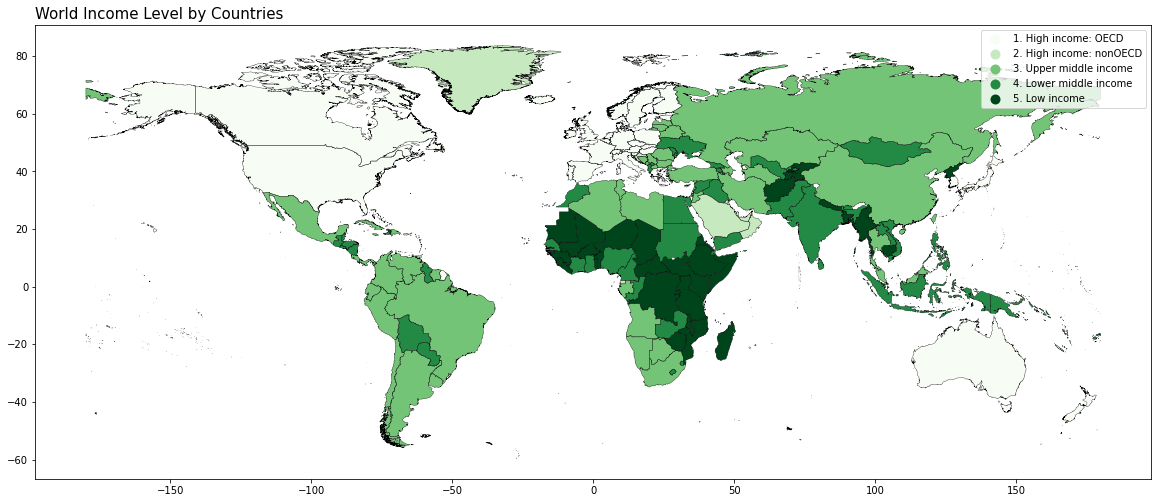

In [ ]:
## Color the map: Income (Classified in dataframe)
fig, ax = plt.subplots(figsize=(20,15))
countries.plot(ax=ax, color="gray", alpha=0.2)
countries.boundary.plot(ax=ax, color="black", lw=0.3)
countries.plot('INCOME_GRP', ax=ax, cmap="Greens", legend=True)
ax.set_title('World Income Level by Countries', loc = 'left', fontsize=15)

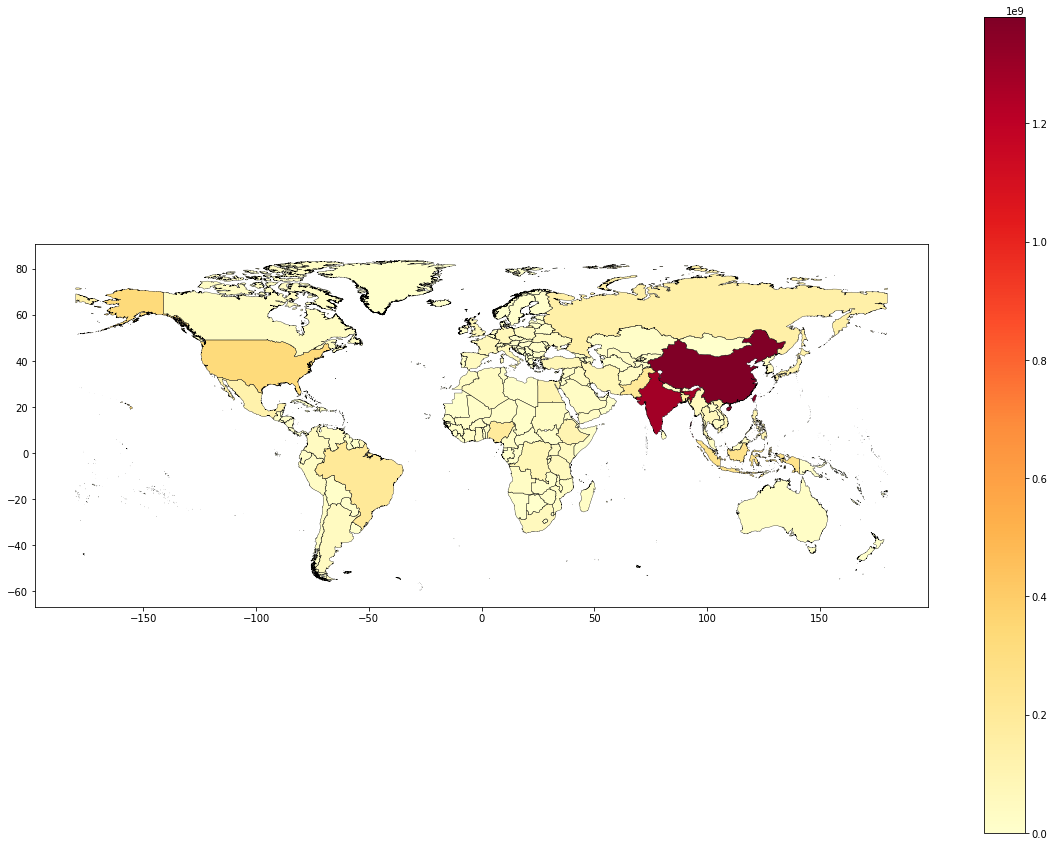

In [ ]:
## Color the map: Income (Classified in dataframe)
fig, ax = plt.subplots(figsize=(20,15))
countries.plot(ax=ax, color="gray", alpha=0.2)
countries.boundary.plot(ax=ax, color="black", lw=0.3)
countries.plot('POP_EST', ax=ax, cmap="YlOrRd", legend=True)

Text(0.0, 1.0, 'Population Level by Country')

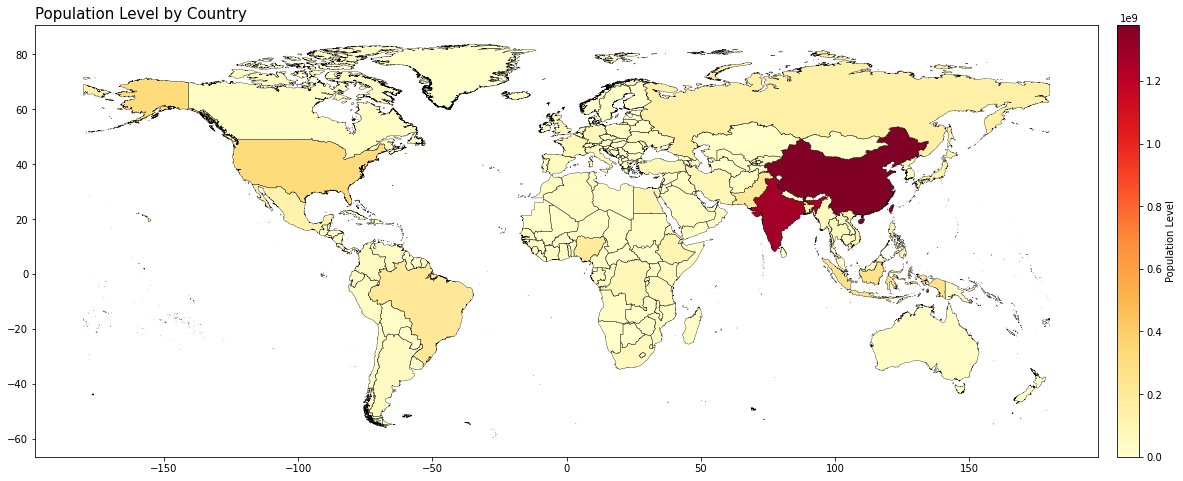

In [ ]:
# fit colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Color the map: Population
fig, ax = plt.subplots(figsize=(20,15))

# fit colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

# Plot population
countries.plot(ax=ax, color="gray", alpha=0.2)
countries.boundary.plot(ax=ax, color="black", lw=0.3)
countries.plot('POP_EST', ax=ax, cmap="YlOrRd", 
               legend=True, cax=cax, 
               legend_kwds={'label': "Population Level", 'orientation': "vertical"})
ax.set_title('Population Level by Country', loc = 'left', fontsize=15)

Let's see Asian countries specifically

In [ ]:
asia = countries[countries.CONTINENT == 'Asia']
asia.shape

(51, 54)

Text(0.0, 1.0, 'Population Level by Country in Asia')

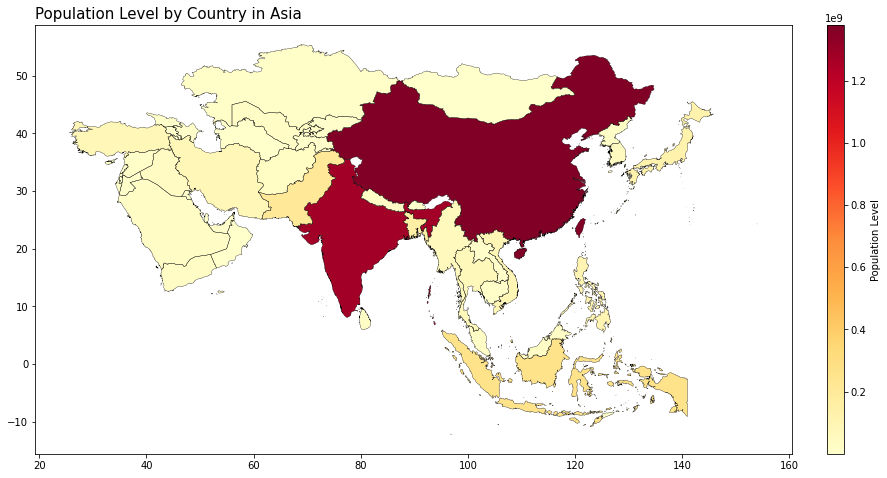

In [ ]:
# Plot population
fig, ax = plt.subplots(figsize=(15,15))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

asia.plot(ax=ax, color="gray", alpha=0.2)
asia.boundary.plot(ax=ax, color="black", lw=0.3)
asia.plot('POP_EST', ax=ax, cmap="YlOrRd", 
               legend=True, cax=cax, 
               legend_kwds={'label': "Population Level", 'orientation': "vertical"})

ax.set_title('Population Level by Country in Asia', loc = 'left', fontsize=15)

Let's see Eurasia by appending dataframes

# Appending GeoDataFrames
europe = world[world.continent == 'Europe']

asia = world[world.continent == 'Asia']

eurasia = europe.append(asia)

https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

In [ ]:
europe = asia = countries[countries.CONTINENT == 'Europe']
asia = countries[countries.CONTINENT == 'Asia']
eurasia = europe.append(asia)
eurasia.shape

(104, 54)

In [ ]:
europe.columns

Index(['FID', 'OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN', 'FORMAL_FR', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH', 'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [ ]:
countries['REGION_UN'].value_counts()

Africa                     55
Americas                   53
Europe                     53
Asia                       50
Oceania                    25
Seven seas (open ocean)    15
Name: REGION_UN, dtype: int64

Text(0.0, 1.0, 'Population Level by Country in Asia')

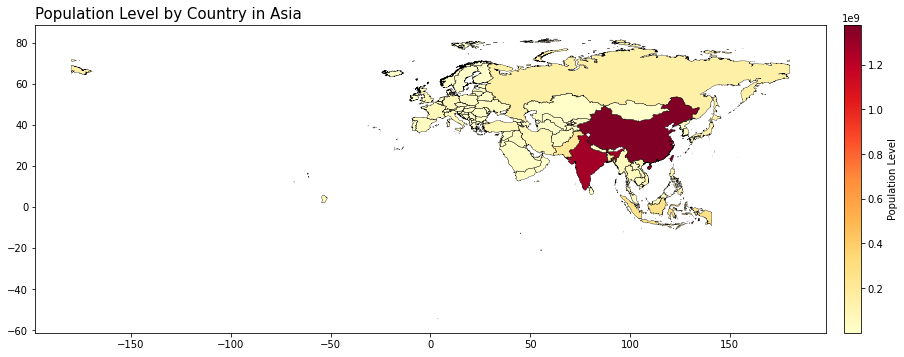

In [ ]:
# Plot population
fig, ax = plt.subplots(figsize=(15,15))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

eurasia.plot(ax=ax, color="gray", alpha=0.2)
eurasia.boundary.plot(ax=ax, color="black", lw=0.3)
eurasia.plot('POP_EST', ax=ax, cmap="YlOrRd", 
               legend=True, cax=cax, 
               legend_kwds={'label': "Population Level", 'orientation': "vertical"})

ax.set_title('Population Level by Country in Asia', loc = 'left', fontsize=15)

Let's plot maps by continents 

In [ ]:
# To preserve raw dataframe
countries_copy = countries.copy()
# Groupby continent to plot continent maps
continent = countries_copy.groupby('CONTINENT')

In [ ]:
# To preserve raw dataframe
countries_copy = countries.copy()
# Groupby continent to plot continent maps
continent = countries_copy.groupby('REGION_UN')

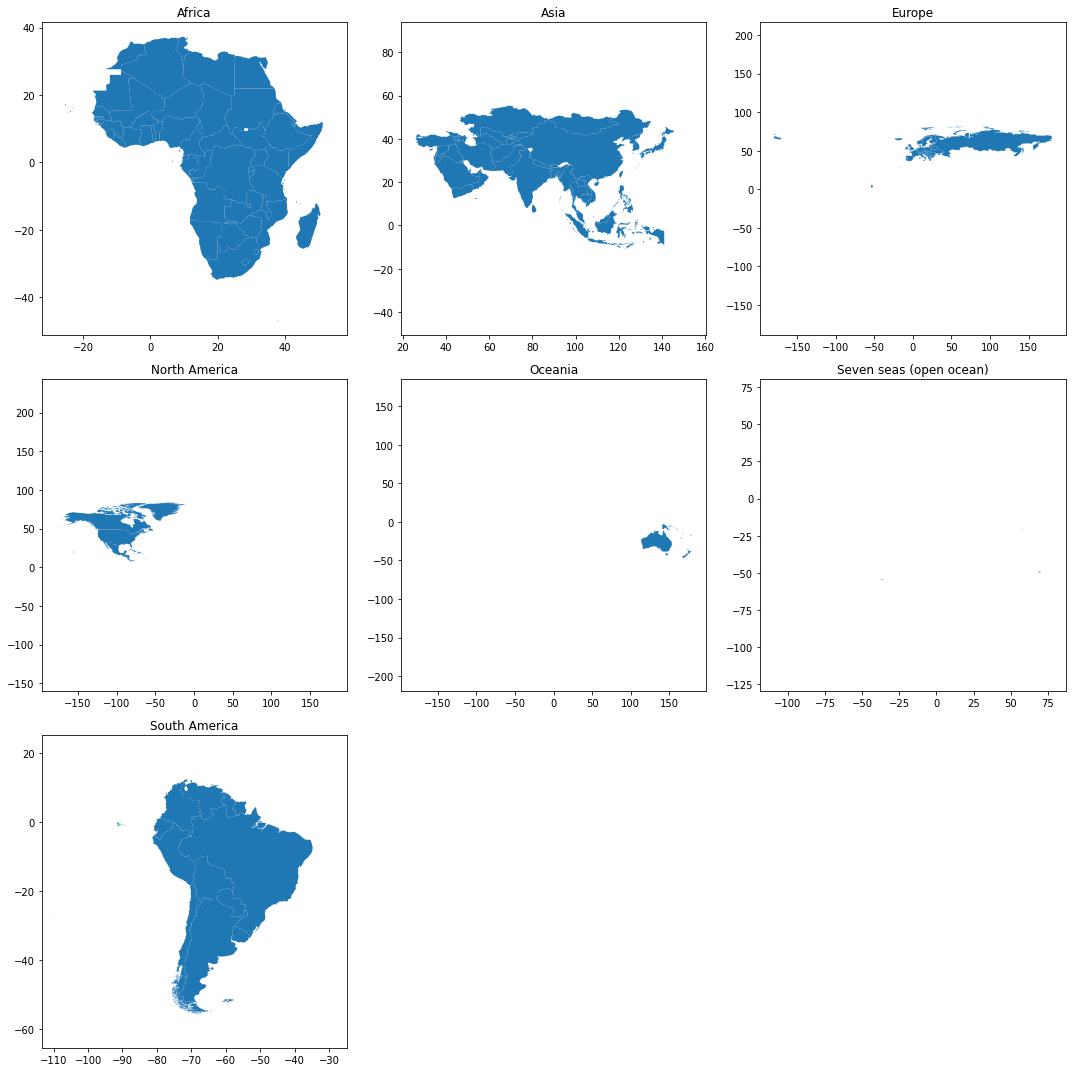

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

# Iterate through continents

for i, (continent_name, countries_copy) in enumerate(continent):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(3, 3, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    countries_copy.plot(ax=ax)
    # set the title
    ax.set_title(continent_name)
    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    ax.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

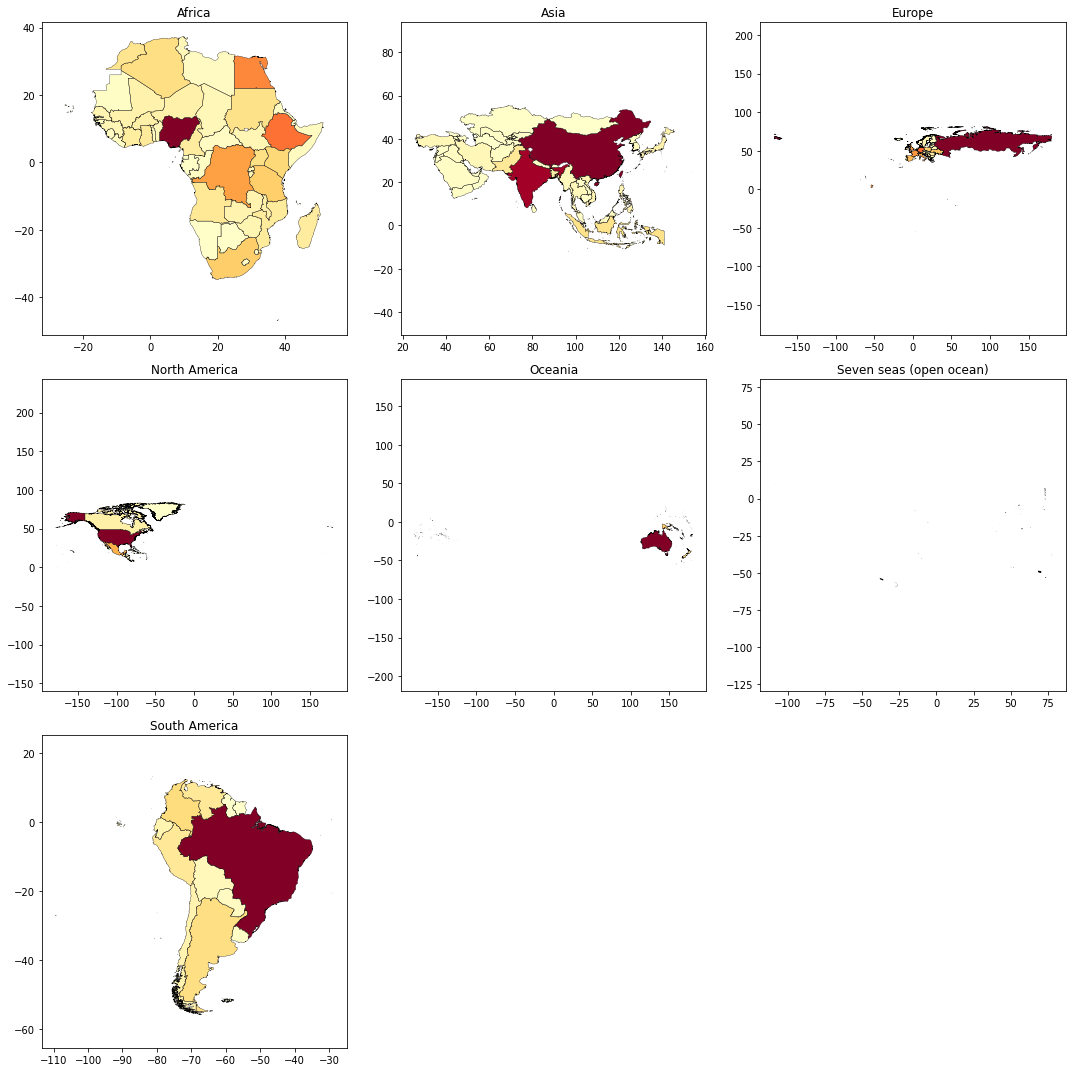

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

for i, (continent_name, countries_copy) in enumerate(continent):
    ax = plt.subplot(3, 3, i + 1) # nrows, ncols, axes position
    countries_copy.plot('POP_EST', ax=ax, cmap="YlOrRd")
    countries_copy.boundary.plot(ax=ax, color="black", lw=0.3)
    ax.set_title(continent_name)
    ax.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

In [ ]:
countries['CONTINENT'].value_counts()

Europe                     53
Africa                     52
Asia                       51
North America              48
Oceania                    25
South America              13
Seven seas (open ocean)     9
Name: CONTINENT, dtype: int64

Now we learned how to lad geodataframe from WB and plot maps by grouping continents and coloring maps. But figure above shows lack of information in geodataframe: 1) some continents are so small to be viewed; and 2) data are limited in raw geodataframe. What if I want to plot different data that are not included in raw geodataframe and view countries that I want? So, now we will learn different way to load geodataframe from WB and function of "spatial join". It will give more opportunities to plot various maps.    

##2nd Way to Load WB DATA using API and spatial join

Q. What if I want to plot data that is not in geodataframe? 

A. We need to use spatial join

https://www.youtube.com/watch?v=FjNEB-GgfZ0

https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html

https://data.worldbank.org/indicator/EN.ATM.CO2E.EG.ZS

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_datareader import wb
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### 2nd way to load data using API 

In [ ]:
# Load raw data that I want to see (e.g. CO2 intensity) 
# 2nd way to load data is using API 
data = wb.download(indicator="EN.ATM.CO2E.EG.ZS", country="all", start=1950,end=2019)
data

EN.ATM.CO2E.EG.ZS
country                     year                   
Africa Eastern and Southern 2019                NaN
                            2018                NaN
                            2017                NaN
                            2016                NaN
                            2015                NaN
...                                             ...
Zimbabwe                    1964                NaN
                            1963                NaN
                            1962                NaN
                            1961                NaN
                            1960                NaN

[15960 rows x 1 columns]

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# Data manipulation 

# Reset index as country
data = data.reset_index(1)

# Rename columns 
data.columns = ['CO2_year', 'CO2_intensity'] # Be careful to rename it without space

data

,CO2_year,CO2_intensity
country,,
Africa Eastern and Southern,2019,NaN
Africa Eastern and Southern,2018,NaN
Africa Eastern and Southern,2017,NaN
Africa Eastern and Southern,2016,NaN
Africa Eastern and Southern,2015,NaN
...,...,...
Zimbabwe,1964,NaN
Zimbabwe,1963,NaN
Zimbabwe,1962,NaN


In [ ]:
# Load geodataframe
map = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
# Check geodataframe whether it can be used as a base map
map['continent'].value_counts() 

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

In [ ]:
# Data manipulation 

# Exclude Antartica to see continents more apparent in map 
map_sub = map[map["name"] != 'Antartica']

# Set index as name
map_sub = map_sub.set_index('name')

# Change column name (2nd way to rename columns)
index_change = {'United States of America': 'United States', 'Russia': 'Russian Federation'}
map_sub = map_sub.rename(index=index_change)

map_sub

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [ ]:
type(map_sub)

geopandas.geodataframe.GeoDataFrame

### Join data

In an attribute join, a GeoSeries or GeoDataFrame is combined with a regular pandas.Series or pandas.DataFrame based on a common variable.
https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

* **data_join = geodataframe.join(pandas.dataframe)** 


* **data_spatial join = gpd.sjoin(geodataframe, geodataframe)** 

(e.g.) join = gpd.sjoin(addresses, pop, how="inner", op="within")

https://automating-gis-processes.github.io/CSC18/lessons/L4/spatial-join.html


GeoDataFrame.sjoin(): joins based on binary predicates (intersects, contains, etc.)

GeoDataFrame.sjoin_nearest(): joins based on proximity, with the ability to set a maximum search radius.

Airbnb example

https://towardsdatascience.com/how-to-easily-join-data-by-location-in-python-spatial-join-197490ff3544


Spatial join options

https://geopandas.org/en/stable/gallery/spatial_joins.html

Codes below are to check how map looks different depending on how dataframes are joined.
**how='outer'** 
- join as right column 
- preserve continents data 
- but include Antartica data (Need to manipulate data or change sjoin options)

**how='inner'**
- join intersects columns 
- lost some continents data that are not included in new pandas dataframe

In [ ]:
pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 300)
pd.set_option("display.width", 1000)

In [ ]:
# Spatial join geodataframe (map) and pandas dataframe (CO2 intensity data)
data_jo = map_sub.join(data, how='outer') 
data_jo

,pop_est,continent,iso_a3,gdp_md_est,geometry,CO2_year,CO2_intensity
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2019,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2018,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2017,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2016,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2015,NaN
...,...,...,...,...,...,...,...
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1963,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1962,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1961,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1960,NaN


Text(0.0, 1.0, 'Population Level by Country')

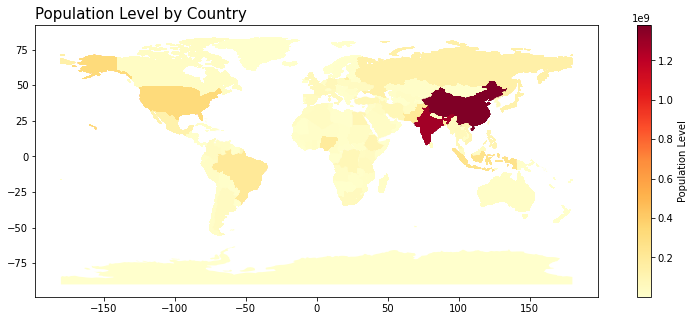

In [ ]:
data_jo.plot('pop_est', legend=True, legend_kwds={'label': "Population Level", 'orientation': "vertical"}, cmap = 'YlOrRd', figsize=(14,5))
plt.title("Population Level by Country", loc = "left", fontsize=15)

In [ ]:
data_ji = map_sub.join(data, how='inner') # join interconnected columns
data_ji

,pop_est,continent,iso_a3,gdp_md_est,geometry,CO2_year,CO2_intensity
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2019,NaN
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2018,NaN
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2017,NaN
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2016,NaN
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2015,NaN
...,...,...,...,...,...,...,...
Zimbabwe,13805084,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1964,NaN
Zimbabwe,13805084,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1963,NaN
Zimbabwe,13805084,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1962,NaN
Zimbabwe,13805084,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1961,NaN


In [ ]:
data_ji['CO2_intensity'].max()

103.157894736842

Text(0.0, 1.0, 'CO2 Intensity Level by Country')

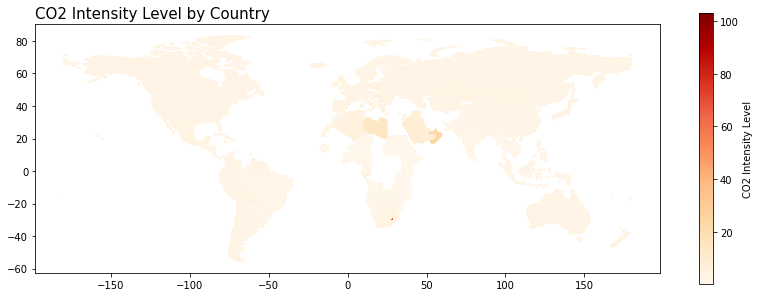

In [ ]:
data_ji.plot('CO2_intensity', legend=True, legend_kwds={'label': "CO2 Intensity Level", 'orientation': "vertical"}, 
             cmap = 'OrRd', figsize=(14,5))
plt.title("CO2 Intensity Level by Country", loc = "left", fontsize=15)

Use quantile to view map more clearly

In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.0, 1.0, 'CO2 Intensity Level by Country')

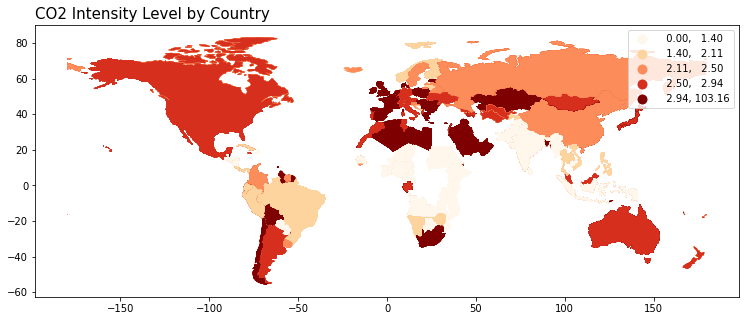

In [ ]:
data_jo.plot('CO2_intensity', legend=True, 
             cmap = 'OrRd', scheme = "quantiles", figsize=(14,5))
plt.title("CO2 Intensity Level by Country", loc = "left", fontsize=15)

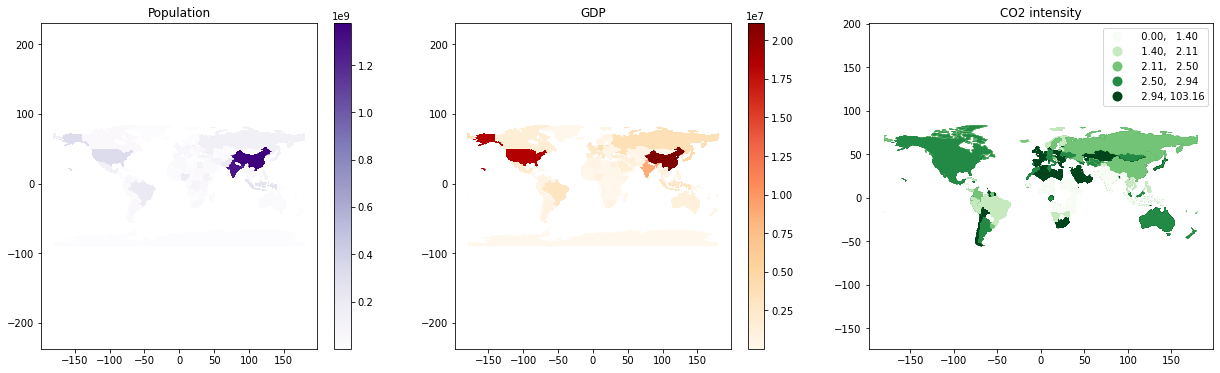

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(21,6))

data_jo.plot("pop_est", ax=ax[0], cmap="Purples", legend=True)
ax[0].set_title("Population")
#ax[0].axis(aspect="auto") # make colorbar equal when plot maps horizontally
ax[0].axis("equal")

data_jo.plot('gdp_md_est', ax=ax[1], cmap="OrRd", legend=True)
ax[1].set_title("GDP")
#ax[1].axis(aspect="auto")
ax[1].axis("equal")

data_jo.plot('CO2_intensity', ax=ax[2], cmap="Greens", legend=True, scheme="quantiles")
ax[2].set_title("CO2 intensity")
#ax[2].legend(loc = 'lower left')
#ax[2].axis(aspect="auto")
ax[2].axis("equal")

plt.show()